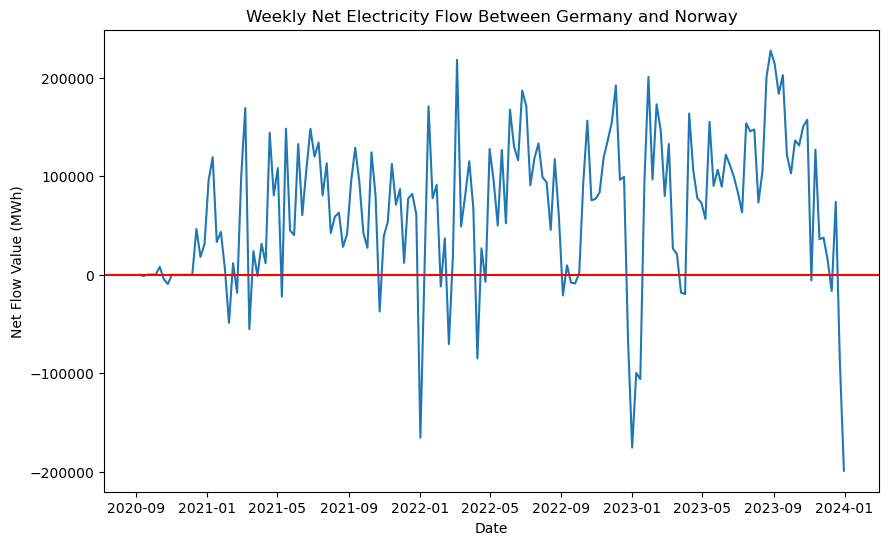

In [289]:
# Importing necessary libraries 

import pandas as pd
import matplotlib.pyplot as plt
import glob

# Load and concatenate all files into a single DataFrame
# Here I was using the same approach as in Task1 but the code was too resource-intensive for my computer, so I had ChatGPT optimizing it and it is slightly different, and faster
DATA_PATH = "./data/PhysicalFlows_12.1.G"
pattern_flow = f'{DATA_PATH}/*_PhysicalFlows_12.1.G.csv'
data_flow = [pd.read_csv(file, sep='\t', parse_dates=["DateTime"]) for file in glob.glob(pattern_flow)]
df_flow = pd.concat(data_flow, axis=0)

# Filter for Germany data with specified MapCodes
df_flow_germany = df_flow.query("InMapCode in ['DE_LU'] and OutMapCode in ['NO2']")

# Ensure the data is sorted by 'DateTime'
df_flow_germany = df_flow_germany.sort_values('DateTime').set_index('DateTime')

# Group by weekly periods and sum the 'FlowValue' column
# Here I was taking the first 162 rows and combining them in a sum using the function "lambda" (there are 162 hours in a week) but ChatGPT recommended me to use the function resample, which would be cleaner and more efficient
df_germany_weekly = df_flow_germany.resample('W').sum(numeric_only=True)


# Filter for Norway data with specified MapCodes
df_flow_norway = df_flow.query("InMapCode in ['NO2'] and OutMapCode in ['DE_LU']")

# Ensure the data is sorted by 'DateTime'
df_flow_norway = df_flow_norway.sort_values('DateTime').set_index('DateTime')

# Group by weekly periods and sum the 'FlowValue' column
df_norway_weekly = df_flow_norway.resample('W').sum(numeric_only=True)


# Now we combine the dataframes to show the flow and whether it is positive or negative

# Calculate the net flow: Germany to Norway minus Norway to Germany
df_net_flow_weekly = df_germany_weekly['FlowValue'] - df_norway_weekly['FlowValue']

# Plot the net flow

plt.figure(figsize=(10, 6))
plt.plot(df_net_flow_weekly.index, df_net_flow_weekly)
plt.title("Weekly Net Electricity Flow Between Germany and Norway")
plt.xlabel("Date")
plt.ylabel("Net Flow Value (MWh)")
plt.axhline(0, color='red')  # We make the line at 0, as it is required
plt.savefig('figure_task4.png')
plt.show()

While this graph is able to showcase the fact that Norway exports considerably more electricity than it imports from Germany, it does not showcase that Norway is still importing electricity from Germany even on the time periods when it generates the most excess. A better graph would be comparing separately the energy exported to each other by both nations.
We can also observe that Norway imports electricity during the winter, which is partly due to the increasing demand of heating homes.